## Intermediate Data Science

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)

## Data Aggregation and Groups

Applying functions to separate groups of your data can be a critical component of data analysis. Often we have questions about how subgroups of the data differ or we might want to compute pivot tables for reporting or visualization. We are going to get more in depth into the `groupby()` function and really see if we can understand what it is doing and what object is returned from it. We will also see how to compute pivot tables and cross-tabulations. 

In [4]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

/opt/anaconda3/lib/python3.12/site-packages/kaleido/_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Grouping

When grouping we use *split-apply-combine* to describe group operations. 

- SPLIT - we first split the data based on one or more keys. Think about categorical values in a single column.
- APPLY - now we apply a function to each of the data subsets that we split above.
- COMBINE - finally the results of these functions are combined into a single summary output or result object.

Here is some example data

In [6]:
#When you grouby it automatically uses the split function and we then we apply some sort of function adn combining it to our dataset. 

df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.049126,-0.554961
1,a,2,0.764736,0.625219
2,None,1,0.201792,-0.929425
3,b,2,1.674667,-0.305443
4,b,1,0.301158,-0.006133
5,a,<NA>,-1.973865,1.470761
6,None,1,0.636466,-0.832402


What if you wanted to calculate the mean of the column data1, but on subsets or groups based on key1.

In [10]:
# First group the data
grouped = df["data1"].groupby(df["key1"])

# What is this object
display(grouped)

Notice that we can't see our data here. This has created a python object that contains all the information we need to apply a function, but it has not actually computed anything yet. We have prepared our split.

Now we will apply a function!

In [12]:
grouped.sum()

key1
a   -1.258255
b    1.975825
Name: data1, dtype: float64

We have now applied a function and combined the results into a series.

### More Examples

In [14]:
# Calculate the mean of the data in column data1
# Group by two keys
# Results in hierarchical index
df["data1"].groupby([df["key1"], df["key2"]]).mean()

key1  key2
a     1      -0.049126
      2       0.764736
b     1       0.301158
      2       1.674667
Name: data1, dtype: float64

In [16]:
# Calculate the means of both column data1 and data2
# Group by both key1 and key2
df.groupby([df["key1"], df["key2"]]).mean()

data1     data2
key1 key2                    
a    1    -0.049126 -0.554961
     2     0.764736  0.625219
b    1     0.301158 -0.006133
     2     1.674667 -0.305443

In [24]:
# Group by key1 and then ask the size of each group
# This will automatically drop NaNs
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [27]:
df.groupby('key1',dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [28]:
# Count the number of nonnull values
df.groupby('key1').count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


### You Try

Try applying some other function that are available to the groupby object. See if you can figure out what the function is doing. To see all the possible functions try groupby. and then hit tab!

In [30]:
# Your code here
df.groupby('data1').count()

df.groupby('key1').nunique()

df.groupby('key1').median()

df.groupby('key1').std()

df.groupby('key1').max()


,key2,data1,data2
key1,,,
a,2,0.764736,1.470761
b,2,1.674667,-0.006133


### Iterating over Groups

You can iterate over the group object returned from groupby().

In [32]:
grouped = df["data1"].groupby(df["key1"])

for g in grouped:
    print(g[0])
    display(g[1])

a


0   -0.049126
1    0.764736
5   -1.973865
Name: data1, dtype: float64

b


3    1.674667
4    0.301158
Name: data1, dtype: float64

You can see that each thing in our grouped object is a tuple. The first entry in the tuple is the group name (or category) the second object is a Series or a DataFrame depending on the number of columns sent in.

In [34]:
grouped = df[["data1","data2"]].groupby(df["key1"])

for g in grouped:
    print(g[0])
    display(g[1])

a


,data1,data2
0,-0.049126,-0.554961
1,0.764736,0.625219
5,-1.973865,1.470761


b


,data1,data2
3,1.674667,-0.305443
4,0.301158,-0.006133


In [43]:
# If you group by two keys, your group names have two values.
grouped = df[["data1","data2"]].groupby([df["key1"],df["key2"]])

for g in grouped:
    print(g[0])
    display(g[1])

('a', np.int64(1))


,data1,data2
0,0.667991,0.258252


('a', np.int64(2))


,data1,data2
1,-0.14364,0.316452


('b', np.int64(1))


,data1,data2
4,0.693085,-1.061101


('b', np.int64(2))


,data1,data2
3,-0.785899,0.383478


### Column vs Row Grouping

By default groups are created on the axis='index' meaning that it is breaking up the rows into groups based on labels in a column. But we could break up columns based on values in a row. 

Here is an example where we group the data based on column names.

1. We take the transpose of the dataframe.
2. Here we send in a dictionary that maps the values found in the index to either key or data.
3. The groupby now splits based on our old column names.

In [36]:
df.T

,0,1,2,3,4,5,6
key1,a,a,None,b,b,a,None
key2,1,2,1,2,1,<NA>,1
data1,-0.049126,0.764736,0.201792,1.674667,0.301158,-1.973865,0.636466
data2,-0.554961,0.625219,-0.929425,-0.305443,-0.006133,1.470761,-0.832402


In [38]:
# Here we map the names found in the index
# To new names - we will group on the new names.
mapping = {"key1": "key", "key2": "key",
            "data1": "data", "data2": "data"}

grouped = df.T.groupby(mapping)

for g in grouped:
    print(g[0])
    display(g[1])

data


,0,1,2,3,4,5,6
data1,-0.049126,0.764736,0.201792,1.674667,0.301158,-1.973865,0.636466
data2,-0.554961,0.625219,-0.929425,-0.305443,-0.006133,1.470761,-0.832402


key


,0,1,2,3,4,5,6
key1,a,a,None,b,b,a,None
key2,1,2,1,2,1,<NA>,1


### Grouping with Functions

You can also use python functions to specify groups. 

For example, in the data below we have information about different people. What if you wanted to group a data set based on the length of their name. You can do that!

In [40]:
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.568582,0.832350,1.792270,-1.715070,0.521948
Steve,1.342123,1.612445,-0.455347,-1.244009,-0.651938
Wanda,1.166549,NaN,NaN,-1.084968,-0.640882
Jill,0.502988,-0.911503,-0.788235,2.125568,-0.432942
Trey,1.851159,-1.649286,-0.413149,-1.720525,-0.698131


In [42]:
grouped = people.groupby(len)

for g in grouped:
    print(g[0])
    display(g[1])

3


,a,b,c,d,e
Joe,0.568582,0.83235,1.79227,-1.71507,0.521948


4


,a,b,c,d,e
Jill,0.502988,-0.911503,-0.788235,2.125568,-0.432942
Trey,1.851159,-1.649286,-0.413149,-1.720525,-0.698131


5


,a,b,c,d,e
Steve,1.342123,1.612445,-0.455347,-1.244009,-0.651938
Wanda,1.166549,NaN,NaN,-1.084968,-0.640882


### You Try

Read in the macro data - same as last class - just run the code below.

Then group the data by year and apply  a function that makes sense with this data. Something like mean, max, min, etc...

Finally plot the resulting time-series data. For example, the average cpi over time.

In [46]:
macro = pd.read_csv("data/macrodata.csv")
data = macro[["year","quarter","cpi", "m1", "tbilrate", "unemp"]]

In [52]:
# Your code here

data.groupby(data["year"]).mean()




,quarter,cpi,m1,tbilrate,unemp
year,,,,,
1959,2.5,29.212500,140.475,3.512500,5.450000
1960,2.5,29.670000,140.450,2.707500,5.575000
1961,2.5,29.937500,143.575,2.395000,6.700000
1962,2.5,30.312500,146.975,2.790000,5.550000
1963,2.5,30.715000,151.825,3.207500,5.650000
1964,2.5,31.092500,157.875,3.567500,5.175000
1965,2.5,31.622500,165.050,4.012500,4.525000
1966,2.5,32.620000,171.300,4.875000,3.800000
1967,2.5,33.575000,179.550,4.330000,3.825000


## Data Aggregation

Data aggregation is when you take an array (or list) of values and apply a transformation that produces a single scalar output. Think about a list of grades and then taking an average.


**Functions that are optimized for the groupby() method**

| Aggregation Function | Description                                                                 | Example Usage                   |
|-----------------------|-----------------------------------------------------------------------------|---------------------------------|
| `sum`                | Sum of values (ignores NaN)                                                 | `df.groupby("col")["val"].sum()` |
| `mean`               | Mean (average) of values (ignores NaN)                                      | `df.groupby("col")["val"].mean()` |
| `median`             | Median (50th percentile)                                                    | `df.groupby("col")["val"].median()` |
| `min`                | Minimum value                                                               | `df.groupby("col")["val"].min()` |
| `max`                | Maximum value                                                               | `df.groupby("col")["val"].max()` |
| `count`              | Count of non-NaN values                                                     | `df.groupby("col")["val"].count()` |
| `size`               | Count of all rows (including NaN)                                           | `df.groupby("col").size()`        |
| `std`                | Standard deviation (ddof=1 by default)                                      | `df.groupby("col")["val"].std()` |
| `var`                | Variance (ddof=1 by default)                                                | `df.groupby("col")["val"].var()` |
| `prod`               | Product of values                                                           | `df.groupby("col")["val"].prod()` |
| `first`              | First non-NaN value in group                                                | `df.groupby("col")["val"].first()` |
| `last`               | Last non-NaN value in group                                                 | `df.groupby("col")["val"].last()` |
| `nunique`            | Number of distinct values    | `df.groupby("col")["val"].nunique()` |

**Functions that can be applied to groupby but are a bit slower**

| Aggregation Function | Description                                  | Example Usage                        | Notes                                   |
|-----------------------|----------------------------------------------|--------------------------------------|-----------------------------------------|
| `mode`               | Most frequent value(s) in group              | `df.groupby("col")["val"].agg(pd.Series.mode)` | Can return multiple values per group |
| `skew`               | Sample skewness of distribution              | `df.groupby("col")["val"].skew()`     | Slower, especially on large groups     |
| `kurt` / `kurtosis`  | Kurtosis (tailedness of distribution)        | `df.groupby("col")["val"].kurt()`     | Not Cython-optimized                   |
| `quantile`           | Value at given quantile (e.g. 0.25, 0.75)    | `df.groupby("col")["val"].quantile(0.25)` | Flexible but slower                   |
| `sem`                | Standard error of the mean                   | `df.groupby("col")["val"].sem()`      | Based on `std / sqrt(n)`               |
| `mad`                | Mean absolute deviation                     | `df.groupby("col")["val"].mad()`      | Not Cythonized                         |
| `describe`           | Multiple summary stats at once               | `df.groupby("col")["val"].describe()` | Returns count, mean, std, min, etc.    |
| Custom functions     | Any user-defined aggregation (via `.apply`)  | `df.groupby("col")["val"].apply(func)`| Flexible but usually much slower        |


Now sometimes you want to apply muptliple functions to a single grouped object. One way to do this is with the `.agg()` function. Lets read in the tips data we have seen before:

In [56]:
tips = pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Now lets say that we want to understand the tip percentage from different groups: smokers vs nonsmokers, vs day of the week. Maybe you want to know the average and standard deviation of the tip percentage and you want to define a calculation of your own called max_to_min that calculates the difference between the max and min percent.

In [59]:
# First we have to add the percentage to the data
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

In [61]:
# Now we can define our own custom function
def max_to_min(arr):
    return arr.max() - arr.min()

In [67]:
# Next lets group the data
grouped = tips.groupby(["day", "smoker"])

In [71]:
# And finally apply the functions using the .agg() 
functions = ["mean", "std", max_to_min]
agg_data = grouped['tip_pct'].agg(functions)
agg_data

mean       std  max_to_min
day  smoker                                
Fri  No      0.151650  0.028123    0.067349
     Yes     0.174783  0.051293    0.159925
Sat  No      0.158048  0.039767    0.235193
     Yes     0.147906  0.061375    0.290095
Sun  No      0.160113  0.042347    0.193226
     Yes     0.187250  0.154134    0.644685
Thur No      0.160298  0.038774    0.193350
     Yes     0.163863  0.039389    0.151240

#### This is a case where I would use pandas .plot()

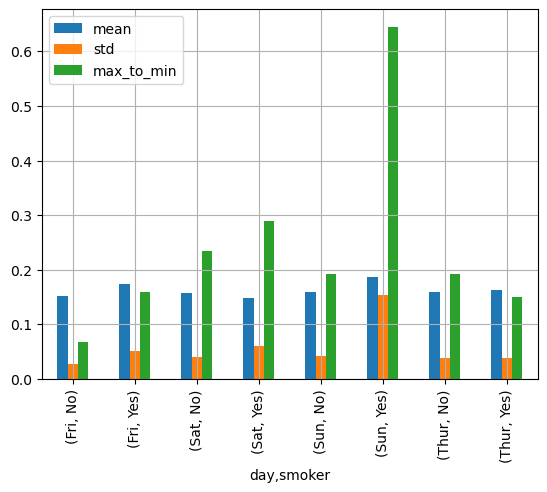

In [165]:
# Graph the results
agg_data.plot.bar()
plt.grid()
plt.show()

In [87]:
# You can also return the data without the groups as and index
# just use the as_index=False command
grouped2 = tips.groupby(["day", "smoker"],as_index=False)
functions = ["mean", "std", max_to_min]
agg_data2 = grouped2['tip_pct'].agg(functions)
agg_data2

,day,smoker,mean,std,max_to_min
0,Fri,No,0.151650,0.028123,0.067349
1,Fri,Yes,0.174783,0.051293,0.159925
2,Sat,No,0.158048,0.039767,0.235193
3,Sat,Yes,0.147906,0.061375,0.290095
4,Sun,No,0.160113,0.042347,0.193226
5,Sun,Yes,0.187250,0.154134,0.644685
6,Thur,No,0.160298,0.038774,0.193350
7,Thur,Yes,0.163863,0.039389,0.151240


From this example hopefully you can see how powerful grouping and aggregating can be in quickly comparing parts of your dataset!

### You Try

What happens when you run the following command using the tip data above? Can you predict what the output will be before you run the code? Then run the code and explain the results. Finally make a plot - your choice on the type.

    grouped = tips.groupby(["day", "smoker","time"])
    functions = ["count", "mean", "max"]
    result = grouped[["tip_pct", "total_bill"]].agg(functions)
    result

### Your code here

The first function will group the tips data by day smoker and time. The functions data is just a list of different options pandas offers. The result function Applies our split into count, mean, and max.

<Axes: xlabel='day,smoker,time'>

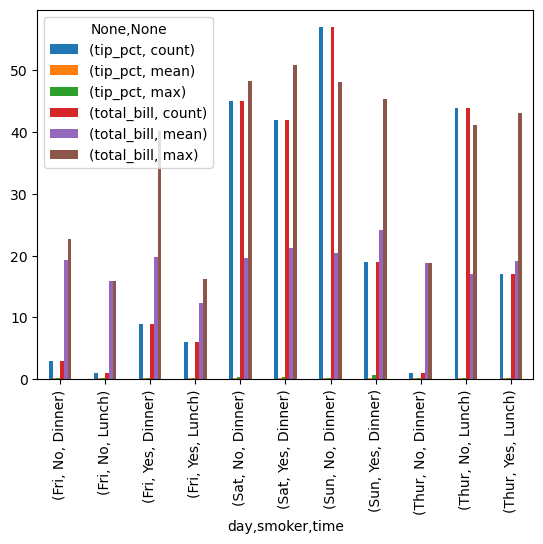

In [78]:
grouped = tips.groupby(["day", "smoker","time"])
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)
result

result.plot.bar()


## Quantile and Bucket Analysis

We have seen some functions that can help us to cut our data into buckets, `pd.cut()` for example. Another similar function is `pd.qcut()` which divides your data into sample quantiles. You can use these functions on grouped data.

Below we will use `.qcut()` to get quartile categories and then group by the quartiles. Finally we can aggregate over that data.

In [91]:
quartiles = pd.qcut(tips['total_bill'],4)
tips['quartiles'] = quartiles
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct,quartiles
0,16.99,1.01,No,Sun,Dinner,2,0.059447,"(13.348, 17.795]"
1,10.34,1.66,No,Sun,Dinner,3,0.160542,"(3.069, 13.348]"
2,21.01,3.50,No,Sun,Dinner,3,0.166587,"(17.795, 24.127]"
3,23.68,3.31,No,Sun,Dinner,2,0.139780,"(17.795, 24.127]"
4,24.59,3.61,No,Sun,Dinner,4,0.146808,"(24.127, 50.81]"


In [103]:
grouped = tips['total_bill'].groupby(tips['quartiles'])
grouped.agg(["count","max","min","mean"])

/tmp/ipykernel_162022/2204673780.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,count,max,min,mean
quartiles,,,,
"(3.069, 13.348]",61,13.28,3.07,10.691967
"(13.348, 17.795]",61,17.78,13.37,15.618689
"(17.795, 24.127]",61,24.08,17.81,20.498525
"(24.127, 50.81]",61,50.81,24.27,32.334590


## More Examples of using groupby()

### Filling Missing Values

In [82]:
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]
location = ["East", "East", "East", "East",
             "West", "West", "West", "West"]
data = pd.DataFrame({'Data':np.random.standard_normal(8),
                     'Location':location}, 
                    index=states)

# Add some NaNs
for s in ["Vermont", "Nevada", "Idaho"]:
    data.loc[s, "Data"] = np.nan
data

,Data,Location
Ohio,-0.351175,East
New York,-0.869518,East
Vermont,NaN,East
Florida,-1.514928,East
Oregon,2.072355,West
Nevada,NaN,West
California,1.755256,West
Idaho,NaN,West


What if we wanted to fill these NaNs, but with different values based on whether they are in the east or west. Maybe we want to average the east and west values and use that number to fill the NaNs.

In [84]:
# Define a function that will return the fill value

#fillmean

def fill_mean(group):
    return group.fillna(group.mean())

# We group by location
grouped = data.groupby('Location')
# Then fill in the NANs with the averages of the group
grouped.apply(fill_mean)

Data
Location                     
East     Ohio       -0.351175
         New York   -0.869518
         Vermont    -0.911874
         Florida    -1.514928
West     Oregon      2.072355
         Nevada      1.913805
         California  1.755256
         Idaho       1.913805

### Groupwise Linear Regression

We talked about linear regression in DATA101 and DATA100. It is a way to fit a straight line to some given data.

We will use sklearn to do this. If you don't have it installed, you should install it.

In [117]:
# !conda install -y scikit-learn

In [86]:
# Get some data
close_px = pd.read_csv("data/stock_px.csv", parse_dates=True,
                       index_col=0)

# The .info() command gives you information about the data
# Including data types and number of nonnulls
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [94]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [96]:
# Lets group the data by year
# First confirm that the index values are dates
first_index = close_px.index[0]
print(first_index)
print(type(first_index))

2003-01-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [92]:
# This is a timestamp object
# You can do first_index. and press tab to see all the options
print(first_index.year)
print(first_index.month)
print(first_index.month_name())
print(first_index.day)
print(first_index.day_name())

2003
1
January
2
Thursday


In [98]:
# So first write a function that will return the year
def get_year(x):
    return x.year

# Then group by the year
by_year = close_px.groupby(get_year)

In [101]:
from sklearn.linear_model import LinearRegression
# Define a liner regression and return intercept and slope
def regress(data,xvars,yvar):
    X = data[xvars]
    y = data[yvar]
    LM = LinearRegression()
    LM.fit(X, y)
    slope = LM.coef_[0]
    intercept = LM.intercept_
    return intercept, slope

# Apply the linear regression to the groups
by_year.apply(regress,yvar='AAPL',xvars=['SPX'])


#How do you know how good your prediction is. How good of a predictor is SPX 

2003     (-8.58984966958583, 0.018505966710274123)
2004    (-132.12116289682777, 0.13256544946109633)
2005     (-299.5951029082232, 0.28683118762773907)
2006    (-133.18691255199062, 0.15566846429728876)
2007     (-432.9175504440356, 0.37990617598041226)
2008     (-36.338143227779796, 0.1461565642803873)
2009      (-164.38487241406196, 0.328252924166416)
2010     (-210.84981430613936, 0.4129004501185556)
2011     (603.8769113704017, -0.19383389320169325)
dtype: object

## Pivot Tables and Cross-Tabulation

### Pivot Table

Pivot tables are often found in spreadsheet programs and are a way to summarize data. We have seen the `.pivot` operation as a way to wrangle the data. Here we will look at the `pivot_table()` method. The results in many cases can be produced using the groupby function, but this acts as a shortcut and can add partial totals or margins to the data.

In [103]:
# Lets use the same tips data that we loaded in above
tips = pd.read_csv("data/tips.csv")
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [105]:
tips.pivot_table(index=["day", "smoker"],
                 values=["size", "tip", "tip_pct", "total_bill"])

#with a pivot mean is default but what if I justed wanted to use the pivot function and maintain the
#data points of the original dataset.

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

**NOTE** by default the pivot table returns the mean()

We could have done the same operation with groupby!

Arguments you might want to pass into the pivot_table() function:

- index -- the values that you are grouping by
- values -- the numbers you are aggregating
- columns -- categories to subset the columns - adding extra columns to the output
- margin=True -- include the margin or the value for the whole
- aggfunc -- aggregation function if you want something other than mean.
- fill_value -- what you want to full if the computation runs into a NaN

Here are some examples:

In [153]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [154]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], aggfunc="max")

size        tip_pct          
smoker        No  Yes        No       Yes
time   day                               
Dinner Fri   2.0  4.0  0.155625  0.263480
       Sat   4.0  5.0  0.291990  0.325733
       Sun   6.0  5.0  0.252672  0.710345
       Thur  2.0  NaN  0.159744       NaN
Lunch  Fri   3.0  2.0  0.187735  0.259314
       Thur  6.0  4.0  0.266312  0.241255

In [156]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct")

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No           NaN  0.137931       NaN       NaN
            Yes          NaN  0.325733       NaN       NaN
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893       NaN
       3    No           NaN  0.154661  0.152663       NaN
            Yes          NaN  0.144995  0.152660       NaN
       4    No           NaN  0.150096  0.148143       NaN
            Yes     0.117750  0.124515  0.193370       NaN
       5    No           NaN       NaN  0.206928       NaN
            Yes          NaN  0.106572  0.065660       NaN
       6    No           NaN       NaN  0.103799       NaN
Lunch  1    No           NaN       NaN       NaN  0.181728
            Yes     0.223776       NaN       NaN       NaN
       2    No           NaN       NaN       NaN  0.166005
            Yes     0.181969       NaN       NaN  0.158843
       3    No      0.187735       NaN       NaN  0.084246
            Yes          NaN       NaN       NaN  0.204952
       4    No           NaN       NaN       NaN  0.138919
            Yes          NaN       NaN       NaN  0.155410
       5    No           NaN       NaN       NaN  0.121389
       6    No           NaN       NaN       NaN  0.173706

In [157]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct",fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

### Crosstab

Cross tabulation is a type of pivot table that returns frequency observations. You can very quickly reach into your data and get counts of the number of observations that fall into each subset.


In [162]:
cdata = pd.crosstab([tips["time"], tips["day"]], tips["smoker"])
cdata

smoker       No  Yes
time   day          
Dinner Fri    3    9
       Sat   45   42
       Sun   57   19
       Thur   1    0
Lunch  Fri    1    6
       Thur  44   17

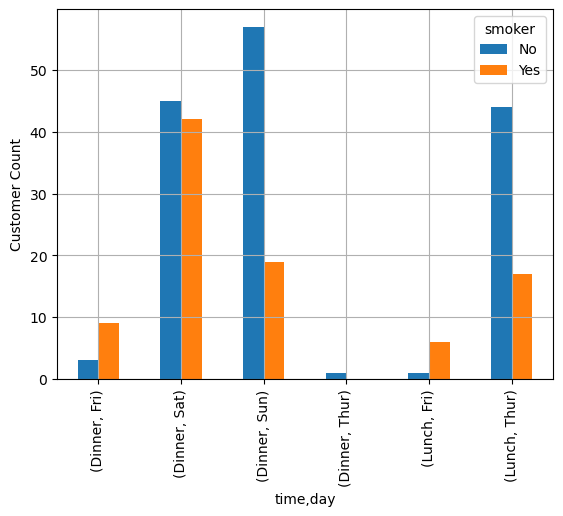

In [164]:
cdata.plot.bar()
plt.grid()
plt.ylabel('Customer Count')
plt.show()